In [1]:
#1 Getting data ready
#2 Choosing Machine learning model
#3 Fit Model
#4 Evaluate the model
#5 Improve the model
#6 Saving the model
#7 Summary

# 1 Getting Your Data Ready

1.1 Split data into features and label, (independent vs dependent variable),x,y

1.2 Filling missing values

1.3 Converting data types

# Standard Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [3]:
heart_disease = pd.read_csv('heart.csv.xls')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X = heart_disease.drop('target',axis=1)

In [5]:
y = heart_disease['target']

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [9]:
len(heart_disease)

1025

In [10]:
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [11]:
from sklearn.ensemble import RandomForestRegressor
heart_disease = RandomForestRegressor()
heart_disease.fit(X_train,y_train);

In [12]:
heart_disease.score(X_test,y_test)

0.9767793051176328

# https://scikit-learn.org/stable/_static/ml_map.png

# Picking up Model for Regression Problem

# Importing Data : California Housing

In [13]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
df_california = pd.DataFrame(housing["data"], columns= housing["feature_names"])
df_california["target"] = pd.Series(housing["target"])
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
len(df_california)

20640

# Lets try Ridge regeression model

In [16]:
from sklearn.linear_model import Ridge

# To reproduce same results for fellow ML Scientist
np.random.seed(1)

# Create Data
X = df_california.drop("target", axis=1)
y = df_california["target"]

# Split into Test and Trtain
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
reg_model = Ridge()

reg_model.fit(X_train,y_train)

#Check the score of the model
reg_model.score(X_test,y_test)

0.5965957761160753

In [17]:
from sklearn.ensemble import RandomForestRegressor

# To reproduce same results for fellow ML Scientist
np.random.seed(1)

# Create Data
X = df_california.drop("target", axis=1)
y = df_california["target"]

# Split into Test and Trtain
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

#Check the score of the model
rf_model.score(X_test,y_test)

0.8069911860615194

# Choosing Estimator for Classification Problem

In [18]:
heart_disease = pd.read_csv("heart.csv.xls")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
len(heart_disease)

1025

In [20]:
from sklearn.svm import LinearSVC

# To reproduce same results for fellow ML Scientist
np.random.seed(1)

# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into Test and Trtain
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate model
SVC_model = LinearSVC()

SVC_model.fit(X_train,y_train)

#Check the score of the model
SVC_model.score(X_test,y_test)

/Users/MWA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7365853658536585

In [21]:
from sklearn.ensemble import RandomForestClassifier

# To reproduce same results for fellow ML Scientist
np.random.seed(1)

# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into Test and Trtain
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train,y_train)

#Check the score of the model
RFC_model.score(X_test,y_test)

1.0

## 1 Structured Data --- Ensemble methods
## 2 Un-Structured Data --- Deep Learning

# Make Prediction

In [22]:
# 2 ways we can run the prediction

# predict()
# predict_proba()


In [23]:
# Step 1

heart_disease = pd.read_csv("heart.csv.xls")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
# Step 2

# split the data in X (actual data) and y (result)

X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"]

In [25]:
# Step 3

# choosing machine learning model

from sklearn.ensemble import RandomForestClassifier
# Create instance of randomforestclassifier
clf = RandomForestClassifier()

In [26]:
# split data into test and train variables

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
# Evaluate the Model
y_predicted = clf.predict(X_test)
y_predicted # Predicted Values

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0])

In [28]:
np.array(y_test) # Ground reality

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0])

In [29]:
np.mean(y_predicted == y_test) # Method 1

1.0

In [30]:
clf.score(X_test,y_test) # Method 2

1.0

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted) # Method 3

1.0

# predict_proba()

In [32]:
clf.predict(X_test)[:5]

array([0, 1, 1, 0, 1])

In [33]:
clf.predict_proba(X_test)[:5]

array([[0.98, 0.02],
       [0.02, 0.98],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99]])

# Making Prediction on regression problem

In [34]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(1)
# create data
X = df_california.drop('target', axis=1)
y = df_california["target"]
# split into test and train
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)
# Instantiate Model
Regression_model = RandomForestRegressor().fit(X_train,y_train)
# Make Prediction
predicted_y = Regression_model.predict(X_test)

In [36]:
predicted_y[:5] # predicted value

array([2.46486  , 1.72717  , 1.6340403, 1.64232  , 4.333443 ])

In [37]:
np.array(y_test[:5]) # Ground Reality

array([2.556, 1.146, 1.375, 1.188, 4.227])

In [38]:
# Compare the prediction with ground reality
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predicted_y)

0.37956069233284895

# Evaluating Machine Learning Model

## Three ways to evaluate sklearn models/estimator
### 1 - Estimator 'Score' method
### 2 - The Scoring Parameters
### 3 - Problem-specific metric function

In [39]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier().fit(X_train,y_train)
clf

RandomForestClassifier()

In [40]:
clf.score(X_train,y_train)

1.0

In [41]:
clf.score(X_test,y_test)

1.0

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5)

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [43]:
clf.score(X_test,y_test),np.mean(cross_val_score(clf,X,y,cv=5))

(1.0, 0.9970731707317073)

# Classification Model Evaluation

## 1 Accuracy
## 2 Area Under the Curve ROC
## 3 Confusion Matrix
## 4 Classification Report

# 1- Accuracy

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
# create Data

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# instantiate Model and fit
clf = RandomForestClassifier().fit(X_train,y_train)


In [45]:
cross_val_score(clf,X,y,cv=5,scoring=None)

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [46]:
np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))

0.9970731707317073

In [47]:
print(f'Heart Disease Cross Validation Accuracy : {np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))*100:.2f}%')

Heart Disease Cross Validation Accuracy : 99.71%


# 2- Area Under the Curve (AUC)
#      Reciever Operating Characteristic Curve (ROC)

In [48]:
# Cteate test train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Fit the model
clf.fit(X_train,y_train)
# make prediction using predict_proba()

y_proba = clf.predict_proba(X_test)


In [49]:
y_proba[:5],y_test[:5]

(array([[0.  , 1.  ],
        [0.95, 0.05],
        [0.05, 0.95],
        [0.98, 0.02],
        [0.  , 1.  ]]),
 386    1
 1      0
 815    1
 174    0
 99     1
 Name: target, dtype: int64)

In [50]:
# case-1 : True Positive  : Truth = 1 and model = 1
# case-2 : False Positive : Truth = 0 and model = 1
# case-3 : True Negative  : Truth = 0 and midel = 0
# case-4 : False Negative : Truth = 1 and model = 0 

In [51]:
y_prob_positive = y_proba[:,1]

In [52]:
from sklearn.metrics import roc_curve
# Calculate fpr,tpr, threshold
fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)

In [53]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03738318, 0.06542056, 0.07476636, 0.13084112,
       0.14953271, 0.24299065, 0.36448598, 0.42990654, 0.45794393,
       0.52336449, 0.65420561, 0.79439252, 1.        ])

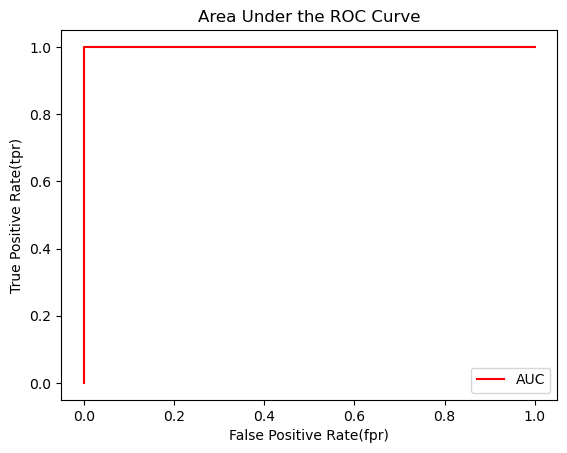

In [54]:
# Create a function for plotting using Matplot lib
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr):
    
    # plot roc curve
    plt.plot(fpr,tpr, color="red", label="AUC")
    
    # Customize the plot
    plt.title("Area Under the ROC Curve")
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)   

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_positive)

1.0

# 3- Confusion Matrix

In [56]:
# Confusion Matrix tells where your model is confused or has lost its Mind
## Case-1  Yes  : True Positive  : Truth = 1 : Model Predict = 1 : Model Got it Right
## Case-2  Oops : False Positive : Truth = 0 : Model Predict = 1 : Model lost its mind
## Case-3  Yes  : True Negative. : Truth = 0 : Model Predict = 0 : Model Got it Right
## Case-4  Oops : False Negative : Truth = 1 : Model Predict = 0 : Model lost its mind

In [57]:
from sklearn.metrics import confusion_matrix
y_predicted = clf.predict(X_test)
confusion_matrix(y_test,y_predicted)

array([[107,   0],
       [  0,  98]])

In [58]:
len(y_test)

205

In [59]:
# To visualize it better
pd.crosstab(y_test,y_predicted,rownames=["Truth"],colnames=["Predicted"])

Predicted,0,1
Truth,,
0,107,0
1,0,98


In [60]:
import seaborn as sns

conf_mat = confusion_matrix(y_test,y_predicted)

def plot_confmatrix(conf_mat):
    
    """
    This Function Plots Confusion Matrix
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel("Truth")
    plt.ylabel("Pridicted")
        

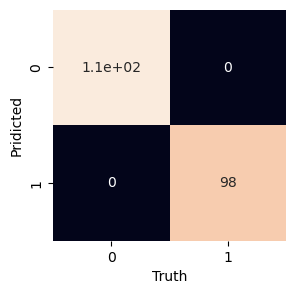

In [61]:
plot_confmatrix(conf_mat)

# 4- Classification Report

In [62]:
# 1 Class Imbalance
# 2 Recall
# 3 Precision
# 4 F1

# Regression model evaluation metrics
# 1 R^2

## Compares your model prediction to the mean for your target

# 2 Mean Absolute Error (MAE)
# 3 Mean Squared Error (MSE)

https://scikit-learn.org/stable/modules/model_evaluation.html


# R^2

In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)

X = df_california.drop('target', axis=1)
y = df_california['target']

# split into test and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

california_model = RandomForestRegressor()
california_model.fit(X_train,y_train)
california_model.score(X_test,y_test)
#### Maximize R^2

0.8069911860615194

In [64]:
# MAE : is the average of the absolute(plus) difference between predicted and actual

# Mean Absolute Error

In [65]:
# MAE

from sklearn.metrics import mean_absolute_error

y_predicted = california_model.predict(X_test)
mae = mean_absolute_error(y_test,y_predicted)
mae

0.32635206574612424

In [66]:
df = pd.DataFrame(data={"Actual Values" : y_test,"Predicted Values" : y_predicted})
df["Differences"] = df["Actual Values"] - df["Predicted Values"]
df
# How wrong our model is
# Minimize this value

,Actual Values,Predicted Values,Differences
4712,3.550,3.547111,0.002889
2151,0.707,0.631910,0.075090
15927,2.294,2.350450,-0.056450
82,1.125,1.287400,-0.162400
8161,2.254,2.889330,-0.635330
...,...,...,...
2319,0.682,0.715010,-0.033010
5341,2.250,2.680600,-0.430600
16888,3.500,2.666110,0.833890
6823,2.273,2.234150,0.038850


# Mean Squared Error

In [67]:
from sklearn.metrics import mean_squared_error

y_pred = california_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

0.2531678939698254

In [68]:
# Manually calculate
mse_manual = np.square(df['Differences'])
mse_manual.mean()

0.2531678939698254

# HyperParameters

## Hyperparameters use 3 ways
## 1 Manualy
## 2 Randomly with RandomSearchCV
## 3 Exhaustively GridSearch CV

# Task 1
## Split data into TEST,TRAIN,VALIDATION sets

# Task 2
## The parameter we are going to use
- max_depth
- max_features
- min_samples_split
- min_samples_leaf
- n_estimators

# Task 1

In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_hyper_metrics(y_true,y_predicted):
    """This function return the Evaluation Metrics"""
    accuracy = accuracy_score(y_true,y_predicted)
    precision = precision_score(y_true,y_predicted)
    recall = recall_score(y_true,y_predicted)
    f1 = f1_score(y_true,y_predicted)
    
    metrics_dict = {"Accuracy ": accuracy,
                   "Precision": precision,
                   "Recall": recall,
                   "F1":f1}
    
    print(f"Accuracy  : {round(accuracy,2)}")
    print(f"Precision : {round(precision,2)}")
    print(f"Recall    : {round(recall,2)}")
    print(f"F1        : {round(f1,2)}")
    
    return metrics_dict

In [89]:
# train
# test
# validate
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [90]:
mixed_heart_disease = heart_disease.sample(frac=1)
mixed_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
459,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
664,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
209,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
351,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
221,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
67,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [91]:
# Split
X = mixed_heart_disease.drop('target',axis=1)
y = mixed_heart_disease['target']

# split data into 3 parts Train = 70%, Test = 15%, Validate = 15%
train_split = round(0.7*len(mixed_heart_disease))
valid_split = round(train_split + 0.15*len(mixed_heart_disease))

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]


In [92]:
len(mixed_heart_disease)

1025

In [93]:
len(X_train),len(X_valid),len(X_test)

(718, 154, 153)

In [94]:
#First Model Result
np.random.seed(7)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
# Baseline prediction
y_predicted = clf.predict(X_valid)
# Evaluating the model
first_result = evaluate_hyper_metrics(y_valid,y_predicted)
first_result

Accuracy  : 0.99
Precision : 1.0
Recall    : 0.99
F1        : 0.99


{'Accuracy ': 0.9935064935064936,
 'Precision': 1.0,
 'Recall': 0.9880952380952381,
 'F1': 0.9940119760479043}

In [95]:
#Second Model Result
np.random.seed(7)
clf2 = RandomForestClassifier(n_estimators=10)
clf2.fit(X_train,y_train)
# Baseline prediction
y_predicted = clf2.predict(X_valid)
# Evaluating the model
second_result = evaluate_hyper_metrics(y_valid,y_predicted)
second_result

Accuracy  : 0.97
Precision : 0.95
Recall    : 0.99
F1        : 0.97


{'Accuracy ': 0.9675324675324676,
 'Precision': 0.9540229885057471,
 'Recall': 0.9880952380952381,
 'F1': 0.9707602339181286}

In [96]:
#Third Model Result
np.random.seed(7)
clf3 = RandomForestClassifier(n_estimators=10,max_depth=10)
clf3.fit(X_train,y_train)
# Baseline prediction
y_predicted = clf3.predict(X_valid)
# Evaluating the model
third_result = evaluate_hyper_metrics(y_valid,y_predicted)
third_result

Accuracy  : 0.97
Precision : 0.98
Recall    : 0.96
F1        : 0.97


{'Accuracy ': 0.9675324675324676,
 'Precision': 0.9759036144578314,
 'Recall': 0.9642857142857143,
 'F1': 0.970059880239521}

# Tuning HyperParameters using Randomized Search Cros Validation (RSCV)

In [97]:

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* max_depth : [None,5,10,20,30]
* n_estimators : [10,100,200,500,1000,12000] 
* min_samples_split : [2,4,6]
* min_samples_leaf : [1,2,4]
* max_features : ["auto","sqrt"]
* n_jobs

In [98]:
hparams = {"max_depth":[None,5,10,20,30],
           "n_estimators":[10,100,200,500,1000,12000],
          "min_samples_split":[2,4,6],
          "min_samples_leaf":[1,2,4],
          "max_features":["sqrt"]}
# split into x and y
X = mixed_heart_disease.drop('target',axis=1)
y = mixed_heart_disease['target']
# split into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

In [101]:
from sklearn.model_selection import RandomizedSearchCV

rscv_clf = RandomizedSearchCV(estimator=clf,
                              param_distributions=hparams,
                              n_iter=10,
                              cv=5,
                              verbose=2)

In [102]:
rscv_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 12000]},
                   verbose=2)

In [103]:
rscv_clf.best_params_

{'n_estimators': 12000,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [104]:
# Running the predictions
rscv_y_predicted = rscv_clf.predict(X_test)
# Evalaute the predictions
fourth_result = evaluate_hyper_metrics(y_test,rscv_y_predicted)

Accuracy  : 0.99
Precision : 0.97
Recall    : 1.0
F1        : 0.98


# Tuning the Hyper Parameters using Grid Search Cross Validation (GSCV)

In [105]:
from sklearn.model_selection import GridSearchCV
hparams2 = {"max_depth":[20,30,50],
           "n_estimators":[200,500,1000],
          "min_samples_split":[2,4],
          "min_samples_leaf":[1,2]}
gscv_clf = GridSearchCV(estimator=clf,
                              param_grid=hparams2,
                              cv=5,
                              verbose=2)
gscv_clf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, min_sa

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tota

[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30, 50], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [106]:
gscv_clf.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [107]:
gscv_clf_y_predicted = gscv_clf.predict(X_test)
# Evaluate the metrics
fifth_result = evaluate_hyper_metrics(y_test,gscv_clf_y_predicted)

Accuracy  : 0.99
Precision : 0.97
Recall    : 1.0
F1        : 0.98


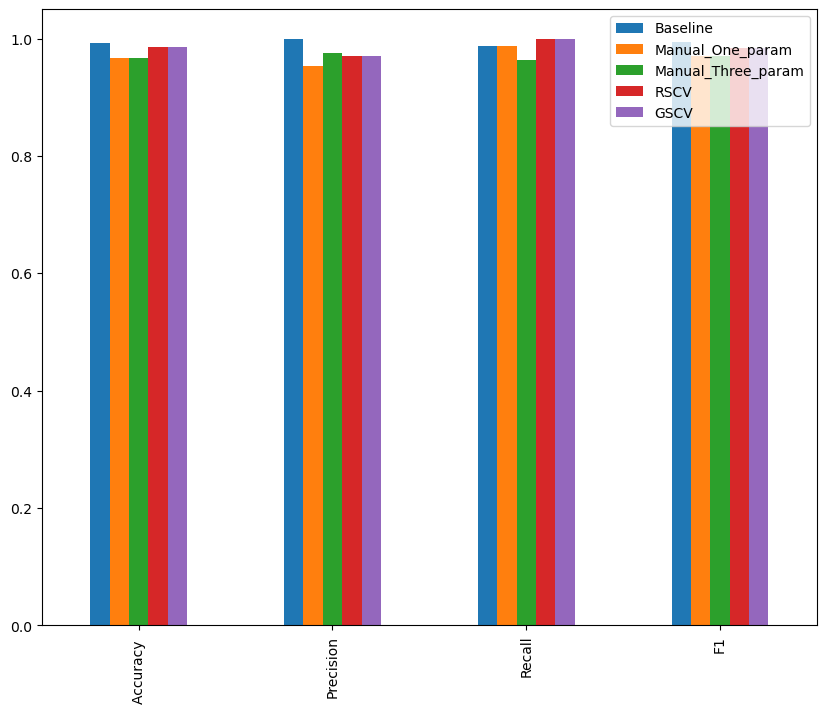

In [108]:
comparison = pd.DataFrame({
    "Baseline": first_result,
    "Manual_One_param": second_result,
    "Manual_Three_param": third_result,
    "RSCV": fourth_result,
    "GSCV": fifth_result
})

comparison.plot.bar(figsize=(10,8));

In [109]:
# by hand
# RSCV
# GSCV

In [110]:
## 1 Getting the data ready
## 2 Choosing machine learning model
## 3 Fit the model
## 4 Evaluate the model
## 5 Improve model
## 6 Saving the model
## 7 Summary

In [111]:
# Save and load model
# Method-1 Pickle
# Method-2 Joblib

In [112]:
# Method-1 Pickle
import pickle
# Save existing model
pickle.dump(gscv_clf,open("gscv_clf_RFM.pkl","wb"))

In [113]:
# Load already save model
pickled_model = pickle.load(open("gscv_clf_RFM.pkl","rb"))

In [114]:
# Make predictions on the looded model
predicted_pickled = pickled_model.predict(X_test)
evaluate_hyper_metrics(y_test,predicted_pickled)

Accuracy  : 0.99
Precision : 0.97
Recall    : 1.0
F1        : 0.98


{'Accuracy ': 0.9853658536585366,
 'Precision': 0.9702970297029703,
 'Recall': 1.0,
 'F1': 0.9849246231155778}

In [115]:
# Method-2 Joblib
from joblib import dump,load

# saving the model
dump(gscv_clf,filename="joblib_gscv.jblib")

['joblib_gscv.jblib']

In [116]:
# looding the model
joblib_model = load(filename="joblib_gscv.jblib")

In [117]:
y_joblib_predicted = joblib_model.predict(X_test)
evaluate_hyper_metrics(y_test,y_joblib_predicted)

Accuracy  : 0.99
Precision : 0.97
Recall    : 1.0
F1        : 0.98


{'Accuracy ': 0.9853658536585366,
 'Precision': 0.9702970297029703,
 'Recall': 1.0,
 'F1': 0.9849246231155778}

# All in One using Sklearn Pipeline

In [118]:
data = pd.read_csv("Phone_data_missing_values.csv")
data

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,White,150043.0,4,$400.00
1,Samsung,Red,87899.0,4,$500.00
2,Nokia,NaN,NaN,3,NaN
3,Iphone,Black,134721.0,2,"$1,000.00"
4,Motorolla,White,213095.0,4,$350.00
...,...,...,...,...,...
955,Nokia,NaN,NaN,4,NaN
956,Samsung,Blue,45687.0,3,$750.00
957,Samsung,Purple,NaN,3,$625.00
958,NaN,White,60000.0,4,$700.00


In [119]:
data.dtypes

Make           object
Colour         object
Memory(kb)    float64
Sim Cards       int64
Price          object
dtype: object

In [121]:
data.isna().sum()

Make           96
Colour        192
Memory(kb)    288
Sim Cards       0
Price         192
dtype: int64

In [122]:
# Step 1 : Fill the missing values
# Step 2 : Convert the data Object type into Num type
# Step 3 : Build a model on the data

In [129]:
# # Getting Data Ready
# import pandas as pd
# import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# # Modelling
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# np.random.seed(7)

# # Import data and fill the missing values

# data = pd.read_csv("Phone_data_missing_values.csv")

# data.dropna(subset=["Price"],inplace=True)
# data["Price"] = data["Price"].str[:-2]
# data["Price"] = data["Price"].str.replace("[\$\,\.]","").astype(int)

/var/folders/86/gcq2cs692_7g0dzj7fg49jfw0000gp/T/ipykernel_15336/986986564.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Price"] = data["Price"].str.replace("[\$\,\.]","").astype(int)


In [130]:
# check price column nan values remove or not
data.isna().sum()

Make          96
Colour         0
Memory(kb)    96
Sim Cards      0
Price          0
dtype: int64

In [131]:
# check types
data.dtypes

Make           object
Colour         object
Memory(kb)    float64
Sim Cards       int64
Price           int64
dtype: object

In [133]:
# Getting Data Ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
np.random.seed(7)

# Import data and fill the missing values

data = pd.read_csv("Phone_data_missing_values.csv")

data.dropna(subset=["Price"],inplace=True)
data["Price"] = data["Price"].str[:-2]
data["Price"] = data["Price"].str.replace("[\$\,\.]","").astype(int)

# Define different Features and Transformer pipeline

################11111###################################
cat_features = ["Make","Colour"]
cat_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

################22222###################################
sim_features = ["Sim Cards"]
sim_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

################33333###################################
num_features = ["Memory(kb)"]
num_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (Fill the missing values then convert to numbers)
preprocessing = ColumnTransformer(transformers=[
    ("cat",cat_transformer,cat_features),
    ("sim",sim_transformer,sim_features),
    ("num",num_transformer,num_features)
])

model = Pipeline(steps=[
    ("preprocessing",preprocessing),
    ("model",RandomForestRegressor())
])

# Split Data
X = data.drop("Price",axis=1)
y = data["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Now Run the Fit and Evaluate
model.fit(X_train,y_train)
model.score(X_test,y_test)





/var/folders/86/gcq2cs692_7g0dzj7fg49jfw0000gp/T/ipykernel_15336/319437770.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Price"] = data["Price"].str.replace("[\$\,\.]","").astype(int)


1.0

In [135]:
# Tuning the hyper parameters with GridSearchCV using Pipeline
hparams3 = {"preprocessing__num__imputer__strategy":['mean','median'],
            "model__max_depth":[20,30,50],
            "model__n_estimators":[200,500,1000],
            "model__min_samples_split":[2,4],
            "model__min_samples_leaf":[1,2]}

my_gscv_model = GridSearchCV(model,hparams3,cv=5,verbose=2)
my_gscv_model.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_sampl

[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__n

[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__

[CV] END model__max_depth=30, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=30, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=median; total time=   1.0s
[CV] END model__max_depth=30, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=median; total time=   1.0s
[CV] END model__max_depth=30, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__

[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imp

[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=median; total time=   1.0s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=median; total time=   1.0s
[CV] END model__max_depth=30, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=median; total time=   0.9s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__n

[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=median; total time=   0.5s
[CV] END model__max_depth=50, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing_

[CV] END model__max_depth=50, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=50, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('sim',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Sim '
                                                                          'Cards']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Memory(kb)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [20, 30, 50],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [200, 500, 1000],
                         'preprocessing__num__imputer__strategy': ['mean',
                                                                   'median']},
             verbose=2)

In [136]:
my_gscv_model.score(X_test,y_test)

1.0